# EMAIL SPAM DETECTION

#  Importing Libraries

In [506]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, auc
import nltk
from nltk.corpus import stopwords
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [127]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

# Reading and Describing Data

In [381]:
# Loading the dataset
df = pd.read_csv("C:\PGA32\MeriSkill\Oasis Infobyte\spam.csv", encoding = 'latin', usecols = ['v1','v2'])

In [382]:
df.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [384]:
df.shape

(5572, 2)

In [385]:
df.describe().T

,count,unique,top,freq
v1,5572,2,ham,4825
v2,5572,5169,"Sorry, I'll call later",30


In [386]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [387]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [388]:
# Rename the columns "v1 and "v2" to new names
new_column_names = {"v1":"Category","v2":"Message"}
df.rename(columns = new_column_names,inplace = True)

In [389]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Data Visualisation

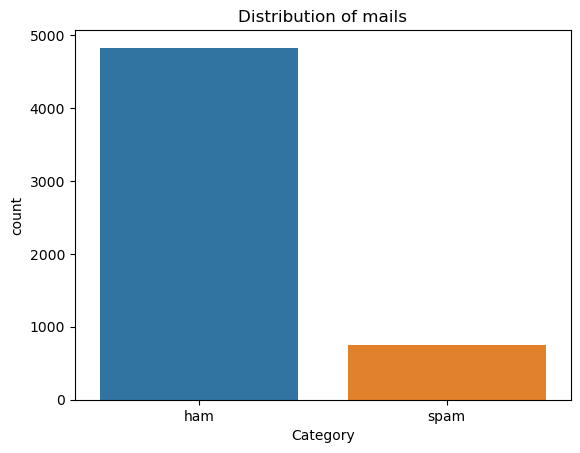

In [390]:
sns.countplot(data=df, x='Category')
plt.xlabel('Category')
plt.ylabel('count')
plt.title('Distribution of mails')
plt.show()

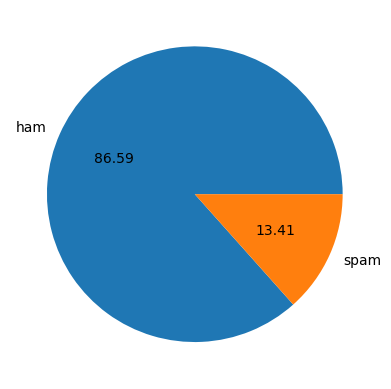

In [391]:
plt.pie(df['Category'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

# Data Preprocessing

## Label Encoding

In [392]:
# encoding "Category" Column
df.replace({'Category':{'spam':0}},inplace=True)

# encoding "Category" Column
df.replace({'Category':{'ham':1}},inplace=True)

df

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will Ì_ b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


### Feature Scaling

In [393]:
# Separate the feature (message) and target (category) data
X = df["Message"]
Y = df["Category"]

In [394]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [395]:
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: int64

In [396]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

## Splitting the data into training data and test data

In [397]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Extraction

## TF-IDF Vectorizer

In [398]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

In [399]:
# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

In [400]:
# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Model Selection and Training

# Random Forest Regression Model

In [419]:
# Initialize a Random Forest classifier
rf_forest = RandomForestClassifier(n_estimators=100)

In [420]:
# Train the classifier on the TF-IDF transformed training data
rf_forest.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [421]:
# Make predictions on the test set
y_pred = rf_forest.predict(X_test_tfidf)

In [422]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [431]:
print(f"Random Forest Accuracy Score: {accuracy:.2f}")

print(f'Confusion Matrix:\n{conf_matrix}')

# print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Random Forest Accuracy Score: 0.98
Confusion Matrix:
[[126  24]
 [  1 964]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.84      0.91       150
           1       0.98      1.00      0.99       965

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [433]:
# #Check the test score and train score to the RandomForestRegressor algorithm
print(f'The Test_accuracy: {rf_forest.score(X_test_tfidf, y_test)*100:.2f}')

#Train score for the data
print(f'The Train_accuracy: {rf_forest.score(X_train_tfidf, y_train)*100:.2f}')

The Test_accuracy: 97.76
The Train_accuracy: 100.00


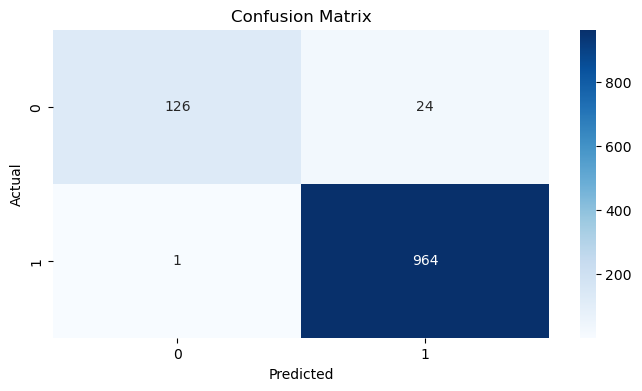

In [425]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Naive Bayes Regression Model

In [426]:
from sklearn.naive_bayes import MultinomialNB

In [436]:
# Initialize a classifier (e.g., Naive Bayes)
naive_b = MultinomialNB()

In [437]:
# Train the classifier on the TF-IDF transformed training data
naive_b.fit(X_train_tfidf, y_train)

MultinomialNB()

In [438]:
# Make predictions on the test set
y_preds = naive_b.predict(X_test_tfidf)

In [439]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_preds)
report = classification_report(y_test, y_preds)

In [440]:
print(f"Naive Bayes Accuracy Score: {accuracy:.2f}")
print(f'Confusion Matrix:\n{conf_matrix}')

# print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Naive Bayes Accuracy Score: 0.97
Confusion Matrix:
[[126  24]
 [  1 964]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.79      0.88       150
           1       0.97      1.00      0.98       965

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [441]:
#Check the test score and train score to the RandomForestRegressor algorithm
print(f'The Test_accuracy: {naive_b.score(X_test_tfidf, y_test)*100:.2f}')

#Train score for the data
print(f'The Train_accuracy: {naive_b.score(X_train_tfidf, y_train)*100:.2f}')

The Test_accuracy: 97.22
The Train_accuracy: 98.59


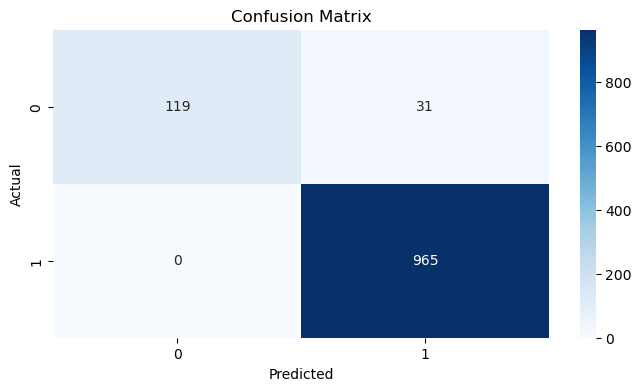

In [442]:
cm = confusion_matrix(y_test, y_preds)
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

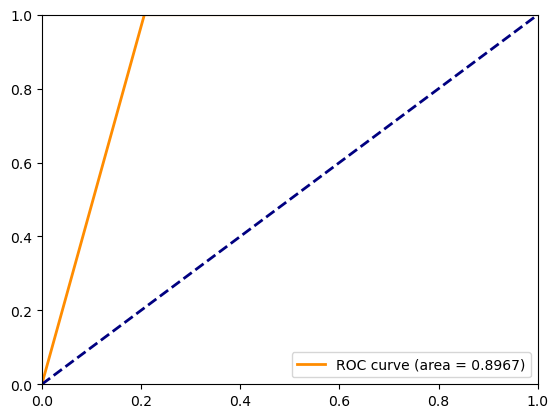

In [505]:
fpr, tpr, _ = roc_curve(y_test, y_preds)
mnb_cv_roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {mnb_cv_roc_auc :.4f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc="lower right")
plt.show()

# Logistic Regresion Model

In [443]:
# Creating and Fit Logistic Regression Model
Log_Reg = LogisticRegression()
Log_Reg.fit(X_train_tfidf, y_train)

LogisticRegression()

# Evaluating the trained model

In [450]:
# Make predictions on the test set
y_pred_sss = Log_Reg.predict(X_test_tfidf)

In [451]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_sss)
report = classification_report(y_test, y_pred_sss)

In [452]:
print(f"Logistic Regression Accuracy Score: {accuracy:.2f}")

print(f'Confusion Matrix:\n{conf_matrix}')
# print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Logistic Regression Accuracy Score: 0.96
Confusion Matrix:
[[126  24]
 [  1 964]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.71      0.82       150
           1       0.96      1.00      0.98       965

    accuracy                           0.96      1115
   macro avg       0.96      0.85      0.90      1115
weighted avg       0.96      0.96      0.95      1115



In [453]:
#Check the test score and train score to the RandomForestRegressor algorithm
print(f'The Test_accuracy: {Log_Reg.score(X_test_tfidf,y_test)*100:.2f}')

#Train score for the data
print(f'The Train_accuracy: {Log_Reg.score(X_train_tfidf, y_train)*100:.2f}')

The Test_accuracy: 95.78
The Train_accuracy: 97.04


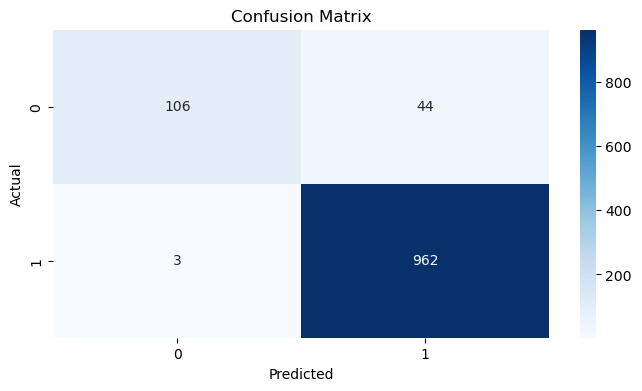

In [454]:
cm = confusion_matrix(y_test, y_pred_sss)
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

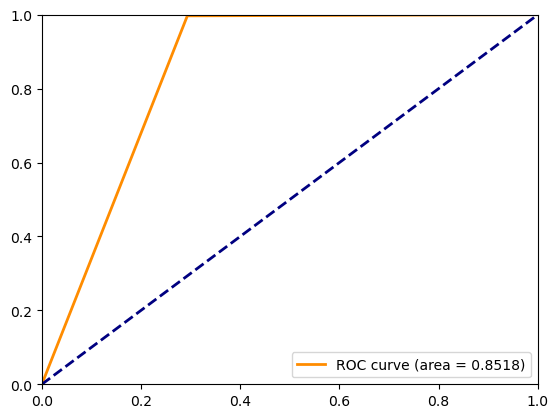

In [507]:
fpr, tpr, _ = roc_curve(y_test, y_pred_sss)
mnb_cv_roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {mnb_cv_roc_auc :.4f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc="lower right")
plt.show()

# Decision Tree Model

In [471]:
from sklearn.tree import DecisionTreeClassifier
Deci_Tree = DecisionTreeClassifier()

In [472]:
# Train the classifier on the TF-IDF transformed training data
Deci_Tree.fit(X_train_tfidf, y_train)

DecisionTreeClassifier()

In [473]:
# Make predictions on the test set
y_predit_s = Deci_Tree.predict(X_test_tfidf)

In [474]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_predit_s)
report = classification_report(y_test, y_predit_s)

In [475]:
print(f"Logistic Regression Accuracy Score: {accuracy:.2f}")

print(f'Confusion Matrix:\n{conf_matrix}')
# print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Logistic Regression Accuracy Score: 0.97
Confusion Matrix:
[[126  24]
 [  1 964]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       150
           1       0.98      0.99      0.98       965

    accuracy                           0.97      1115
   macro avg       0.94      0.92      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [476]:
#Check the test score and train score to the RandomForestRegressor algorithm
print(f'The Test_accuracy: {Deci_Tree.score(X_test_tfidf,y_test)*100:.2f}')

#Train score for the data
print(f'The Train_accuracy: {Deci_Tree.score(X_train_tfidf, y_train)*100:.2f}')

The Test_accuracy: 96.86
The Train_accuracy: 100.00


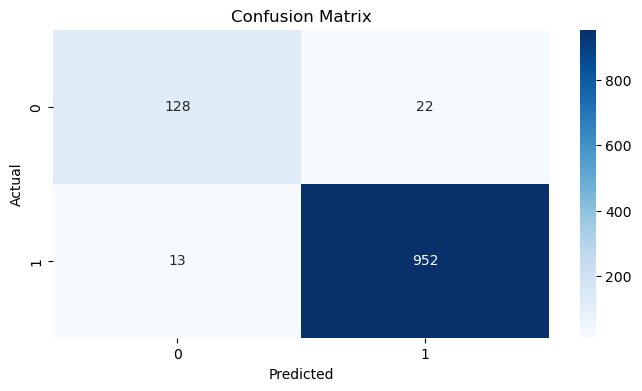

In [478]:
cm = confusion_matrix(y_test, y_predit_s)
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Support Vector Machine Model

In [480]:
from sklearn.svm import SVC

In [481]:
SVM = SVC(kernel='linear', C=1)

In [484]:
# Train the classifier on the TF-IDF transformed training data
SVM.fit(X_train_tfidf, y_train)

SVC(C=1, kernel='linear')

In [485]:
# Make predictions on the test set
y_prediitttt = SVM.predict(X_test_tfidf)

In [486]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_prediitttt)
report = classification_report(y_test, y_prediitttt)

In [487]:
print(f"Logistic Regression Accuracy Score: {accuracy:.2f}")

print(f'Confusion Matrix:\n{conf_matrix}')
# print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Logistic Regression Accuracy Score: 0.98
Confusion Matrix:
[[126  24]
 [  1 964]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       150
           1       0.98      1.00      0.99       965

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [488]:
#Check the test score and train score to the RandomForestRegressor algorithm
print(f'The Test_accuracy: {SVM.score(X_test_tfidf,y_test)*100:.2f}')

#Train score for the data
print(f'The Train_accuracy: {SVM.score(X_train_tfidf, y_train)*100:.2f}')

The Test_accuracy: 97.94
The Train_accuracy: 99.66


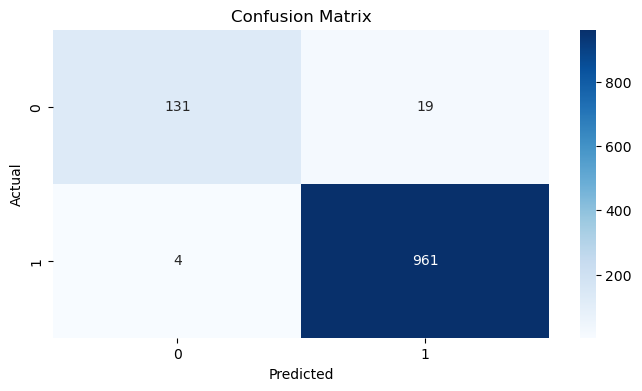

In [489]:
cm = confusion_matrix(y_test, y_prediitttt)
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Test the model with an email messages

In [499]:
# Assuming you have already trained your model and have the 'model' and 'feature_extraction' objects

new_mail = ["U dun say so early hor... U c already then say..."]

# Transform the new email using the same TF-IDF vectorizer
new_data_features = feature_extraction.transform(new_mail)

# Make a prediction using the trained model
prediction = model.predict(new_data_features)

# Output the prediction
if prediction[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")

Spam Mail


# Project Report
## All Train, Test Accuracy Reports through visualization

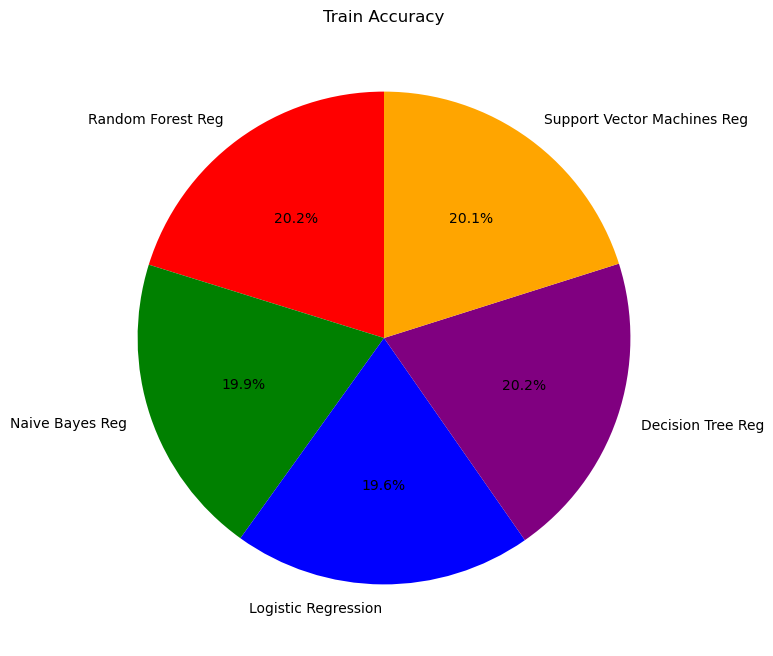

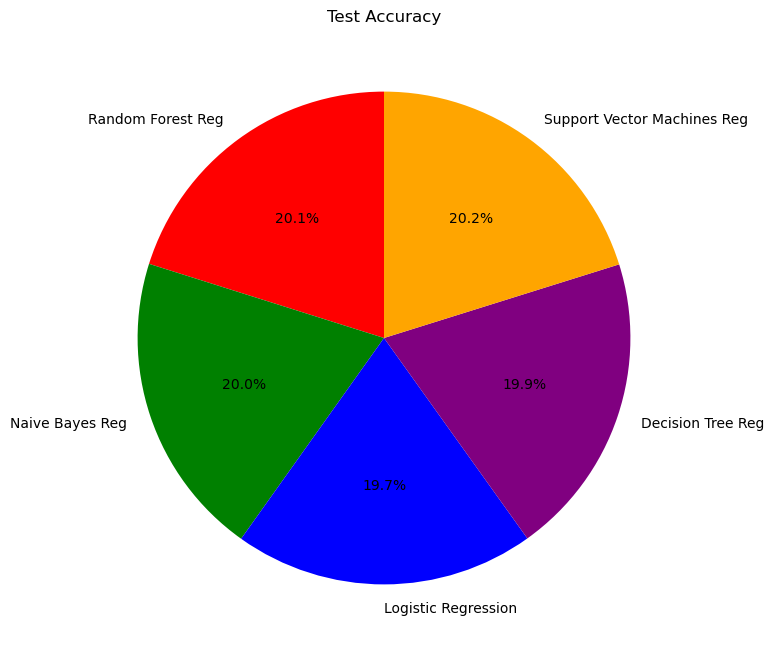

In [493]:
models = ["Random Forest Reg", "Naive Bayes Reg", "Logistic Regression", "Decision Tree Reg", "Support Vector Machines Reg"]
train_accuracies = [100.00, 98.59, 97.04, 100.00, 99.66]
test_accuracies = [97.76, 97.22, 95.78, 96.86, 97.94]

# Set the colors for the pie chart
colors = ['red', 'green', 'blue', 'purple', 'orange']

plt.figure(figsize=(8, 8))
plt.pie(train_accuracies, labels=models, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Train Accuracy")
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(test_accuracies, labels=models, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Test Accuracy")
plt.show()


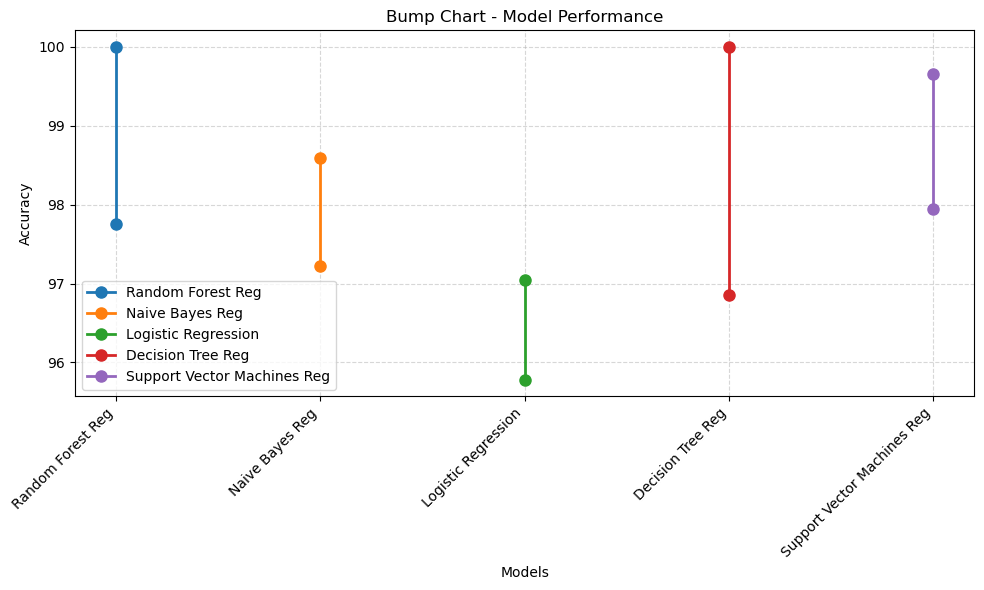

In [495]:
models = ["Random Forest Reg", "Naive Bayes Reg", "Logistic Regression", "Decision Tree Reg", "Support Vector Machines Reg"]
train_accuracies = [100.00, 98.59, 97.04, 100.00, 99.66]
test_accuracies = [97.76, 97.22, 95.78, 96.86, 97.94]

# Set the width of the lines
line_width = 2

# Create an array of equally spaced positions for the lines
x = np.arange(len(models))

plt.figure(figsize=(10, 6))
# Create lines for each model connecting train and test accuracies
for i in range(len(models)):
    plt.plot([x[i], x[i]], [train_accuracies[i], test_accuracies[i]], marker='o', markersize=8, linewidth=line_width, label=models[i])

# Set title and labels
plt.title("Bump Chart - Model Performance")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(x, models, rotation=45, ha="right")

# Display the plot
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Thank You For Reading 